In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle

In [2]:
COMBINED_DATA = os.path.join('..', 'data', 'combined-data.csv')

In [3]:
songs_df = pd.read_csv(COMBINED_DATA)
songs_df.head()

,Year,Artist,Title,URL,TrackId,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,...,Mode,Speechiness,Tempo,Time Signature,Valence,Album,Image,Explicit,Popularity,Winner
0,1958,Nel Blu Dipinto Di Blu (Volare),Nel Blu Dipinto Di Blu (Volare),https://open.spotify.com/track/006Ndmw2hHxvnLb...,006Ndmw2hHxvnLbJsBFnPx,0.987,0.518,216373.0,0.060,0.000008,...,1.0,0.0441,127.870,4.0,0.336,Tutto Modugno (Mister Volare),https://i.scdn.co/image/5e8c49f7a8d161c1d65109...,False,35.0,1
1,1958,Henry Mancini,The Music From Peter Gunn,https://open.spotify.com/track/3BdPP6Xce6FUcfa...,3BdPP6Xce6FUcfaCFsnZIg,0.893,0.550,177733.0,0.318,0.881000,...,1.0,0.0313,138.037,4.0,0.620,The music from Peter Gunn,https://i.scdn.co/image/1ad2e8ce1f988c27678298...,False,16.0,1
2,1958,Ella Fitzgerald,Ella Fitzgerald Sings The Irving Berlin Song Book,https://open.spotify.com/track/5FY0EikZVSBOwpj...,5FY0EikZVSBOwpjQa9S5Ii,0.675,0.615,138320.0,0.186,0.000000,...,0.0,0.0508,73.007,4.0,0.749,Ella Fitzgerald Sings The Irving Berlin Song Book,https://i.scdn.co/image/3350581fb4712a44a6f6b5...,False,34.0,1
3,1958,Catch A Falling Star,Catch A Falling Star,https://open.spotify.com/track/0qu9P0DcFcgAycR...,0qu9P0DcFcgAycRsbWupnZ,0.259,0.726,176840.0,0.330,0.000309,...,1.0,0.0330,109.158,4.0,0.712,I Just Came Home To Count The Memories,https://i.scdn.co/image/848ede6cee3d8111533c7e...,False,39.0,1
4,1958,Billy May's Big Fat Brass,Billy May's Big Fat Brass,https://open.spotify.com/track/4fv9FQ1TNeAYw8z...,4fv9FQ1TNeAYw8zJrVMUi7,0.421,0.711,145907.0,0.254,0.000045,...,0.0,0.0374,115.418,4.0,0.552,Billy May's Big Fat Brass,https://i.scdn.co/image/04fbb97c5d46c80d9fc9e1...,False,9.0,1


In [4]:
songs_df.columns

Index(['Year', 'Artist', 'Title', 'URL', 'TrackId', 'Acousticness',
       'Danceability', 'Duration (ms)', 'Energy', 'Instrumentalness', 'Key',
       'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo',
       'Time Signature', 'Valence', 'Album', 'Image', 'Explicit', 'Popularity',
       'Winner'],
      dtype='object')

In [5]:
X = songs_df.drop(labels=['Artist', 'Title', 'URL', 'TrackId', 'Album', 'Image', 'Winner'], axis=1)
X.head()

,Year,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence,Explicit,Popularity
0,1958,0.987,0.518,216373.0,0.060,0.000008,10.0,0.1610,-14.887,1.0,0.0441,127.870,4.0,0.336,False,35.0
1,1958,0.893,0.550,177733.0,0.318,0.881000,0.0,0.0311,-14.516,1.0,0.0313,138.037,4.0,0.620,False,16.0
2,1958,0.675,0.615,138320.0,0.186,0.000000,0.0,0.1940,-12.382,0.0,0.0508,73.007,4.0,0.749,False,34.0
3,1958,0.259,0.726,176840.0,0.330,0.000309,1.0,0.0704,-14.864,1.0,0.0330,109.158,4.0,0.712,False,39.0
4,1958,0.421,0.711,145907.0,0.254,0.000045,0.0,0.1360,-12.661,0.0,0.0374,115.418,4.0,0.552,False,9.0


In [6]:
X.dtypes

Year                  int64
Acousticness        float64
Danceability        float64
Duration (ms)       float64
Energy              float64
Instrumentalness    float64
Key                 float64
Liveness            float64
Loudness            float64
Mode                float64
Speechiness         float64
Tempo               float64
Time Signature      float64
Valence             float64
Explicit               bool
Popularity          float64
dtype: object

In [7]:
X.Explicit = X.Explicit.astype(int)

In [8]:
X.Explicit.value_counts()

0    13379
1     1107
Name: Explicit, dtype: int64

In [9]:
#excluded_features = ['Year',  'Duration (ms)', 'Key',  'Mode', 'Speechiness', 'Tempo', 'Valence', 'Explicit']
excluded_features = ['Key']
X.drop(labels=excluded_features, axis=1, inplace=True)


In [10]:
y = songs_df['Winner']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Winner, dtype: int64

In [11]:
y.value_counts()

0    10940
1     3546
Name: Winner, dtype: int64

In [12]:
# Modeling Multi-linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.2141064958528528


In [14]:
# Build a residual plot

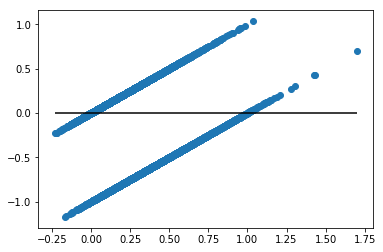

In [15]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [16]:
filename = os.path.join('..', 'model', 'grammy_prediction_multi_linear_model.h5')
pickle.dump(model, open(filename, 'wb'))

In [17]:
from sklearn.externals import joblib
scaler_file = os.path.join('..', 'model', 'grammy_prediction_scaler.sav')
joblib.dump(model, scaler_file) 

['..\\model\\grammy_prediction_scaler.sav']